# 第10周作业 



#### 题 1：score.csv中有两门功课的成绩单，要求：
- 读入该成绩；
- 计算总分和名次
- 按照总分排名（由高到低）
- print出新的排名情况
- 输出到新的文件score_sorted.csv之中
- 同时，存成xlsx文件格式

In [4]:
# 题 1 
# 代码完成如下
import csv
list=[]
with open("score.csv",'r',encoding="utf-8-sig")as f:
    csv_reader=csv.reader(f)
    for row in csv_reader:
        list.append(row)
    del list[0]
    
    for each in list:
            zf=int(each[1])+int(each[2]) #计算总分
            each.append(zf)  

    list.sort(key=lambda x:x[3],reverse=True) #从高到低排序得出排名
    for each in list:
        each.append(list.index(each)+1)
    
    #print最新情况
    print(['name','math','english','total points','rank'])
    for each in list:
        print(each)
        
import pandas as pd
columns=['name','math','english','total points','rank']
dt=pd.DataFrame(list,columns=columns)
dt.to_csv("score_sorted.csv",index=0)
dt.to_excel("score_sorted.xlsx",index=0)

['name', 'math', 'english', 'total points', 'rank']
['Geoge', '95', '85', 180, 1]
['Charlie', '82', '92', 174, 2]
['Chirstian', '76', '83', 159, 3]
['Bob', '73', '83', 156, 4]
['Daniel', '65', '78', 143, 5]
['John', '45', '65', 110, 6]


#### 题 2：找出含3个元音字母以上的单词，要求：
- 读入zenofpython.txt，
- 将其中所有单词中，含有3个及以上元音字母的单词输出到新的文件zen_words.txt之中
- 单词用空格隔开，每个单词均为小写。

In [162]:
# 题 2 代码写于此
with open("zen_words.txt","w")as file:
    with open("zenofpython.txt",mode='r')as f:
        list=[]
        list1=f.readlines()
        list2=[]
        for i in range(len(list1)):
            m=list1[i]
            list2+=m.split()
        for each in list2:
            j=0
            each=each.lower()
            for i in range(len(each)):
                if each[i]=='a' or each[i]=='e' or each[i]=='i' or each[i]=='o' or each[i]=='u':
                    j+=1
            if j>=3:
                list.append(each) #得到初步列表，但单词带有标点和缩写
        #提纯单词字母
        wordlist=[]
        for k in range(len(list)):
            n=[each for each in list[k]]
            if n[-1] in ',.!--':  #去末尾标点
                del n[-1]
                word="".join(n)
                wordlist.append(word)
            elif '-'in n:         #去开头标点
                n.remove('-')
                if '-'in n:
                    n.remove('-')
                    word="".join(n)
                    wordlist.append(word)
                else:
                    word="".join(n)
                    wordlist.append(word)
            elif "'" in n:        #去缩写
                q=n.index("'")
                a=n[0:q]
                b=n[q:len(n)]
                if b=='re':
                    b='are'
                elif b=='ve':
                    b='have'
                elif b=='s':
                    b='is'
                d=0
                for c in range(len(a)):
                    if a[c]=='a' or a[c]=='e' or a[c]=='i' or a[c]=='o' or a[c]=='u':
                        d+=1
                if d>=3:
                    wordlist.append(a)
                f=0
                for e in range(len(a)):
                    if b[e]=='a' or b[e]=='e' or b[e]=='i' or b[e]=='o' or b[e]=='u':
                        f+=1
                if f>=3:
                    wordlist.append(b)
            else:
                wordlist.append(list[k])
        for each in wordlist:
            eachword=each+" "
            print(eachword,end="")
            file.write(eachword)

beautiful explicit implicit complicated readability special special enough although practicality explicitly silenced ambiguity refuse temptation preferably obvious although obvious although implementation explain idea implementation explain idea namespaces idea 

#### 题 3：——  根据姓氏笔画顺序排序


In [203]:
# 题 3 
# 有如下列表，存在namelist.csv之中，请根据姓氏笔画顺序排序,如果姓笔画一样，按照第二个字排序，以此类推
# 并存入到文件，namelist1.csv之中
# 汉字笔画，可按刚刚学过的课件提供的文件来
        
import csv
#提取名字各字
list=[];firstname=[];secondname=[];thirdname=[]
with open("namelist.csv",'r',encoding='utf-8') as file:
    list1=file.readlines()
    del(list1[0])
        
for i in range(len(list1)):
    a=list1[i]
    if i<9:
        firstname.append(a[10]);secondname.append(a[11])
        if a[-4]!=',':
            thirdname.append(a[12])
        else:
            thirdname.append(0)
    else:
        firstname.append(a[11]);secondname.append(a[12])
        if a[-4]!=',':
            thirdname.append(a[13])
        else:
            thirdname.append(0)
#使用汉字文件，得到名字各字笔画
with open("hanzi_pinyin_bihua_utf_8.txt",'r',encoding='utf-8')as f1:
    for each in range(3):
        hzline=f1.readline()
    list2=f1.readlines()
    hz,py,bh = [],[],[]
    for each in list2:
        a,b,c=each.split()
        hz.append(a);py.append(b);bh.append(c)
list3=[];list4=[];list5=[]
for each in firstname:
    m=each
    b=bh[hz.index(m)]
    list3.append(b)
for each in secondname:
    m=each
    b=bh[hz.index(m)]
    list4.append(b)
for each in thirdname:
    if each!=0:
        m=each
        b=bh[hz.index(m)]
        list5.append(b)
    else:
        list5.append('0')
#个人信息与名字前三个字笔画数对应
list6=[]
for i in range(len(list1)):
    a=list1[i]
    c=int(list3[i])
    d=int(list4[i])
    e=int(list5[i])
    list6.append([c,d,e])
#排序
list7=[]
for k in range(len(list1)):
    tuple=(list1[k],list6[k])
    list7.append(tuple)
list8=sorted(list7,key=lambda x:(x[1][0],x[1][1],x[1][2]))
list9=[]
for each in list8:
    list9.append(each[0])
for eachname in list9:
    print(eachname)
        
with open("namelist1.csv",'w',encoding='ansi',newline='')as file:
    csv_writer=csv.writer(file)
    csv_writer.writerow(["序号","学号","姓名"])
    for eachname in list9:
        each=eachname.split(',')
        csv_writer.writerow(each)
    
        

25,2052703,丁梦娟

37,2053623,马梓铭

5,2050243,王一越

8,2051274,韦泽宇

13,2051735,方鹏

35,2053609,王潇

32,2053363,史政宇

20,2052204,刘浩男

39,2053919,向晓清

18,2052119,刘铭宇

16,2052115,邢晨卓

24,2052682,孙煜凯

19,2052126,吕瑞鑫

29,2053150,张艺薰

1,1650363,张正峰

28,2053136,肖羽飞

22,2052517,李宇航

6,2050870,杨辰瀚

42,2054428,张佳乐

36,2053613,陈昊瑞

38,2053848,吴炫达

9,2051430,李健

21,2052296,严铭阳

26,2052704,张智猛

17,2052118,张溢诚

11,2051634,陈澄

31,2053353,李鑫蕊

23,2052604,单越辉

33,2053373,姜丹琳

41,2054161,项霆宇

12,2051734,胡聪莹

10,2051477,顾英子

7,2051225,徐振

15,2051814,梁骏劼

2,1851012,崔啸松

30,2053154,韩天意

34,2053482,曾栎宇

40,2054005,辜润泽

14,2051807,覃振章

3,1951063,蓝天宇宙

4,2050228,潘婧怡

27,2052904,瞿杰



#### 题 4(附加题，感兴趣的同学来完成)
心形线的平面直角坐标系方程表达式分别为 ：
$$x^2+y^2+a*x=a*sqrt(x^2+y^2)$$
$$x^2+y^2-a*x=a*sqrt(x^2+y^2)$$
- 请尝试输出lsp文件，在CAD绘制心形图案
- 大家也可以自己找一个方程生成心形图案

(-11.0, 11.0, -0.8167024984731246, 17.150752467935614)

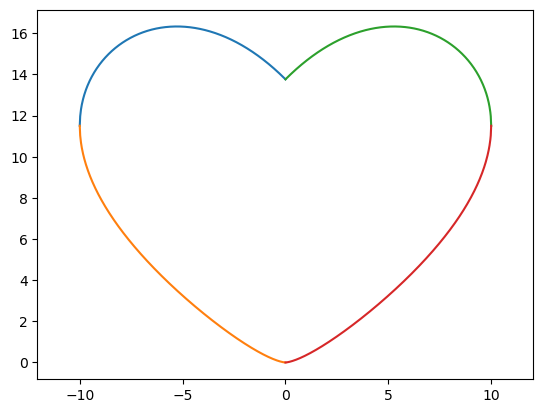

In [59]:
import matplotlib.pyplot as plt

size = 10 #心形大小倍数
x0,y0 = 0,0 #中心位置

a, n = 1.3765, 1000
x = [(each-n//2)*2/n for each in range(0,n+1)]
f1 = lambda x:2*x*x+2*a*x-a*a
f2 = lambda x:x*x*x*x+2*a*x*x*x
f3 = lambda x:2*x*x-2*a*x-a*a
f4 = lambda x:x*x*x*x-2*a*x*x*x

x1 = [x0+each*size for each in x if each <=0]
y11 = [(-1*f1(t)/2+(f1(t)**2+4*f2(t))**0.5/2)**0.5*size for t in x if t<=0]
y12 = [(-1*f1(t)/2-(f1(t)**2+4*f2(t))**0.5/2)**0.5*size for t in x if t<=0]

x2 = [x0+each*size for each in x if each >=0]
y21 = [(-1*f3(t)/2+(f3(t)**2+4*f4(t))**0.5/2)**0.5*size for t in x if t>=0]
y22 = [(-1*f3(t)/2-(f3(t)**2+4*f4(t))**0.5/2)**0.5*size for t in x if t>=0]

plt.figure()
plt.plot(x1,y11)
plt.plot(x1,y12)
plt.plot(x2,y21)
plt.plot(x2,y22)
plt.axis('equal')

In [2]:
# 题 4 代码






## 结束